#FRETBursts - 8-spot smFRET burst analysis

*This notebook is part of a [tutorial series](https://github.com/tritemio/FRETBursts_notebooks) for the [FRETBursts](http://tritemio.github.io/FRETBursts/) burst analysis software.*

> For a step-by-step introduction to FRETBursts usage please refer to [us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).
>
> In this notebook we present a typical [FRETBursts](https://github.com/tritemio/FRETBursts/)
> workflow for **multi-spot smFRET burst analysis**. 
> Briefly, we show how to perform background estimation, burst search, burst selection, 
> FRET histograms, and FRET efficiency fit using different methods. 

##Loading the software

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
-------------------------------------------------------------
 You are running FRETBursts (version 0.4rc11).

 If you use this software in a publication, please cite it as:

   FRETBursts - An opensource single-molecule FRET bursts analysis toolkit.
   A. Ingargiola 2014. https://github.com/tritemio/FRETBursts

-------------------------------------------------------------


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sns = init_notebook()

In [3]:
import lmfit; lmfit.__version__

'0.8.3'

In [4]:
import phconvert; phconvert.__version__

'0.4.5'

#Downloading the sample data file

The complete example dataset can be downloaded from [here](http://dx.doi.org/10.6084/m9.figshare.1019906).

Here we download an 8-spot smFRET measurement file using the `download_file` function provided by FRETBursts: 

In [5]:
url = 'http://files.figshare.com/2040496/12d_New_30p_320mW_steer_3.hdf5'

In [6]:
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/2040496/12d_New_30p_320mW_steer_3.hdf5
File: 12d_New_30p_320mW_steer_3.hdf5
 
File already on disk: C:\Data\Antonio\software\src\fretbursts_notebooks\notebooks\data/12d_New_30p_320mW_steer_3.hdf5 
Delete it to re-download.


# Selecting a data file

In [7]:
file_name = "12d_New_30p_320mW_steer_3.hdf5"

In [8]:
# Here the folder is the subfolder "data" of current notebook folder
folder_name = './data/'

Find the full file name:

In [9]:
full_fname = folder_name + file_name
full_fname

'./data/12d_New_30p_320mW_steer_3.hdf5'

In [10]:
import os
assert os.path.exists(full_fname)

## Data load and Burst search

Load and process the data:

In [11]:
d = loader.photon_hdf5(full_fname)

For convenience we can set the correction coefficients right away so that they will be used in the subsequent analysis. The correction coefficients are: 

* leakage or bleed-through: `leakage`
* direct excitation: `dir_ex` (ALEX-only)
* gamma-factor `gamma`

The direct excitation cannot be applied to non-ALEX (single-laser) smFRET measurements (like the current one).

In [12]:
d.leakage = 0.038
d.gamma = 0.43

> **NOTE:** at any later moment, after burst search, a simple reassignment of these coefficient will update the burst data with the new correction values.

Compute background and burst search:

In [13]:
d.calc_bg(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)
d.burst_search(L=10, m=10, F=7)

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   [DONE Counting D/A]


Perform a background plot as a function of the channel:

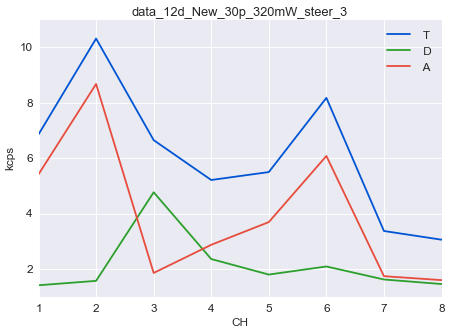

In [14]:
mch_plot_bg(d)

Let's take a look at the photon waiting times histograms and at the fitted background rates:

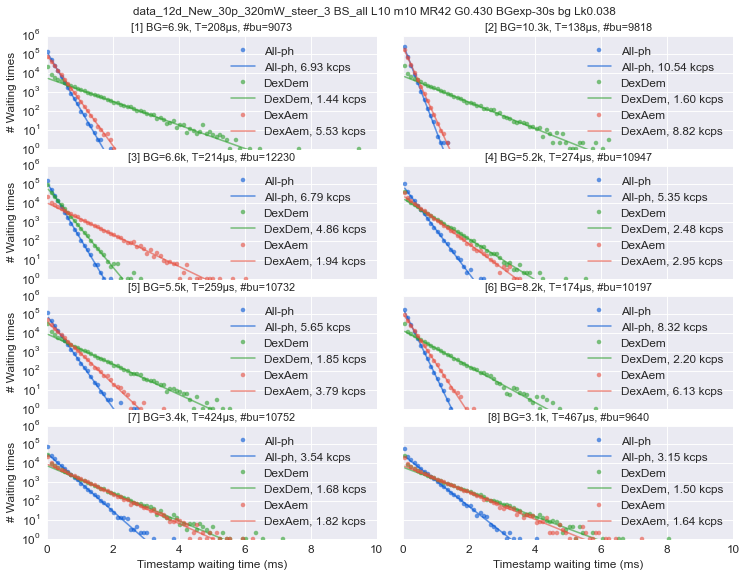

In [15]:
dplot(d, hist_bg);

Using `dplot` exactly in the same way as for the single-spot data has now generated 8 subplots, one for each channel.

Let's plot a timetrace for the background to see is there are significat variations during the measurement:

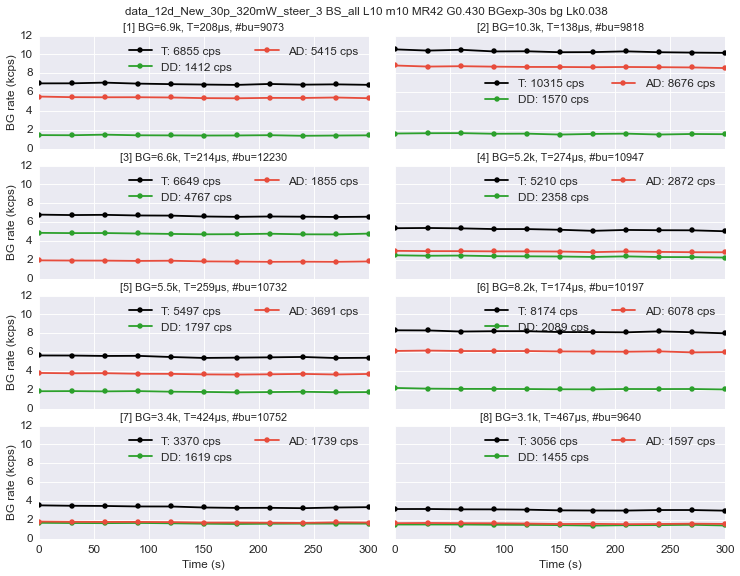

In [16]:
dplot(d, timetrace_bg);

We can look at the timetrace of the photon stream (binning):

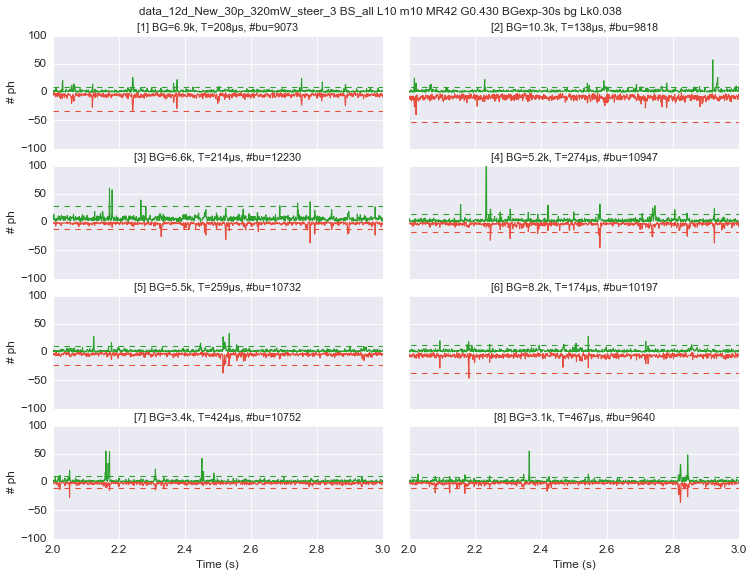

In [17]:
dplot(d, timetrace)
xlim(2, 3); ylim(-100, 100);

We can also open the same plot in an interactive window that allows scrolling (uncomment the following lines):

In [18]:
#%matplotlib qt

In [19]:
#dplot(d, timetrace, scroll=True);

In [20]:
#ylim(-100, 100)

In [21]:
#%matplotlib inline

## Burst selection and FRET

### Selecting bursts by burst size (`select_bursts.size`)

In [22]:
gamma = d.gamma
gamma

array(0.43)

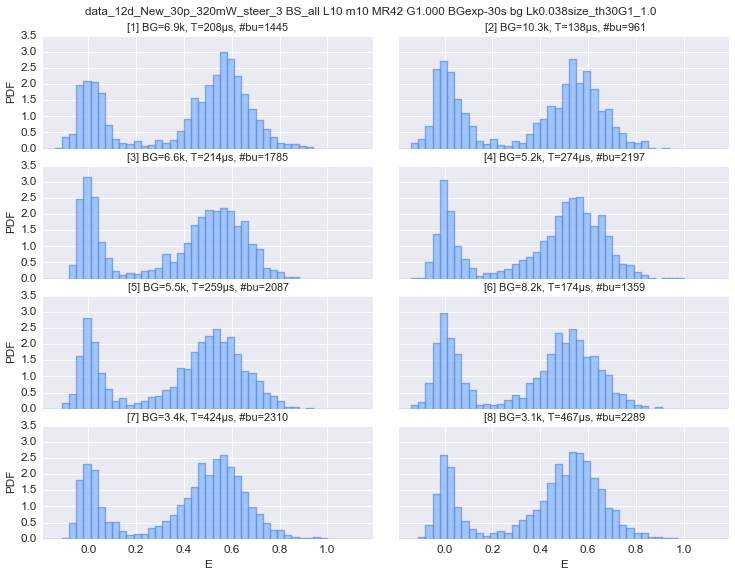

In [23]:
d.gamma = 1
ds = d.select_bursts(select_bursts.size, th1=30, gamma1=1)
dplot(ds, hist_fret);

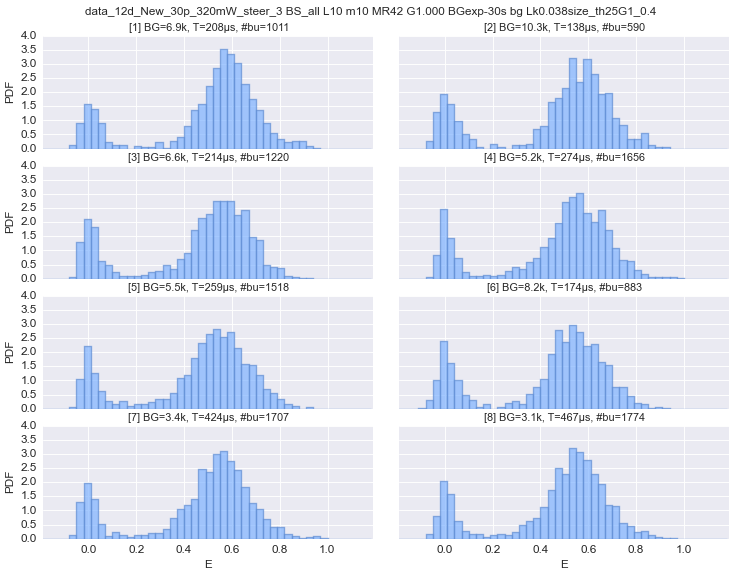

In [24]:
ds = d.select_bursts(select_bursts.size, th1=25, gamma1=gamma)
dplot(ds, hist_fret);

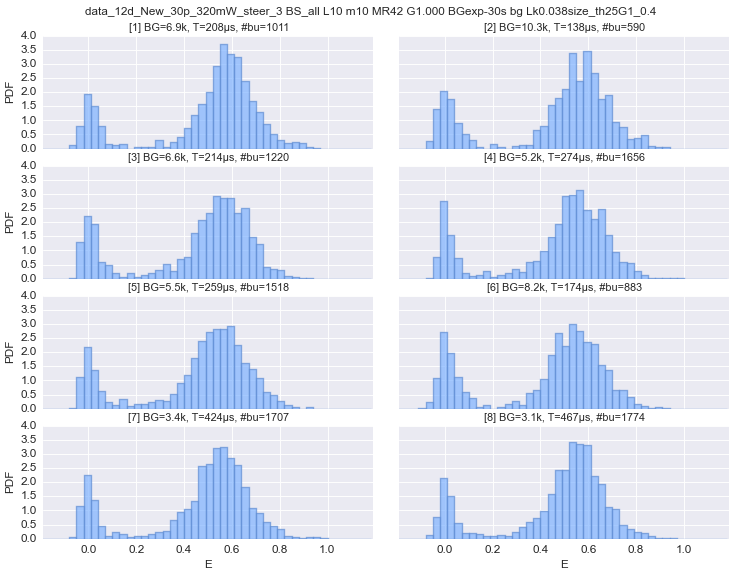

In [25]:
ds = d.select_bursts(select_bursts.size, th1=25, gamma1=gamma)
dplot(ds, hist_fret, weights='size', gamma=gamma);

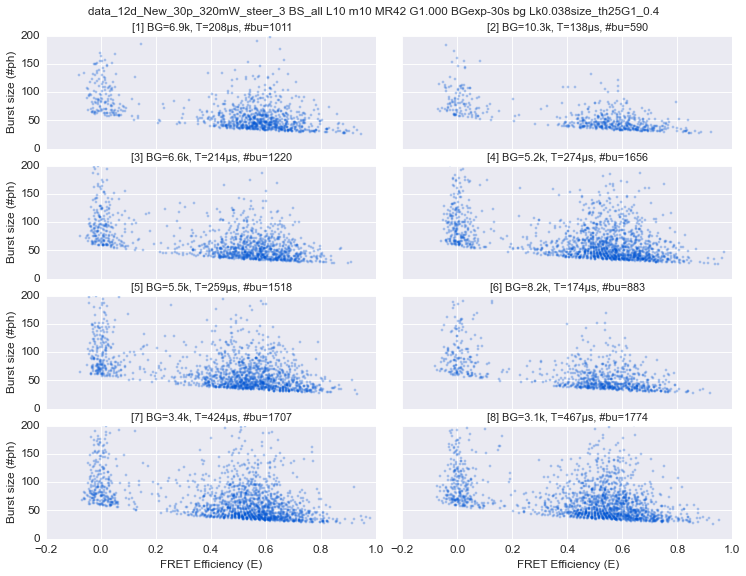

In [26]:
dplot(ds, scatter_fret_nd_na); ylim(0,200);

##FRET Fitting

###2-Gaussian mixture

Let's fit the $E$ histogram with a 2-Gaussians model:

In [27]:
ds.gamma = 1.
bext.bursts_fitter(ds, weights=None)
ds.E_fitter.fit_histogram(mfit.factory_two_gaussians())

 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"
 - Adding parameter "p2_fwhm"
 - Adding parameter "p1_fwhm"


The fitted parameters are stored in a pandas DataFrame:

In [28]:
ds.E_fitter.params

,p2_center,p1_sigma,p1_center,p2_amplitude,p2_sigma,p1_amplitude
0,0.5832623,0.0389312,0.009362509,0.8040815,0.0977268,0.1581942
1,0.5749006,0.04331868,0.006664334,0.779328,0.1065066,0.2044385
2,0.5666107,0.03454152,0.004056891,0.787448,0.1119466,0.1903068
3,0.5630488,0.02780333,0.002136078,0.8028537,0.1144251,0.1649553
4,0.5516281,0.02945006,-0.0002683416,0.8122893,0.1186797,0.1569254
5,0.5491373,0.03836944,0.006786607,0.7739523,0.1101629,0.2064355
6,0.5557532,0.03282982,-0.001295577,0.8047344,0.1099789,0.1639296
7,0.5547366,0.03155131,0.005485045,0.7995965,0.1073709,0.1616016


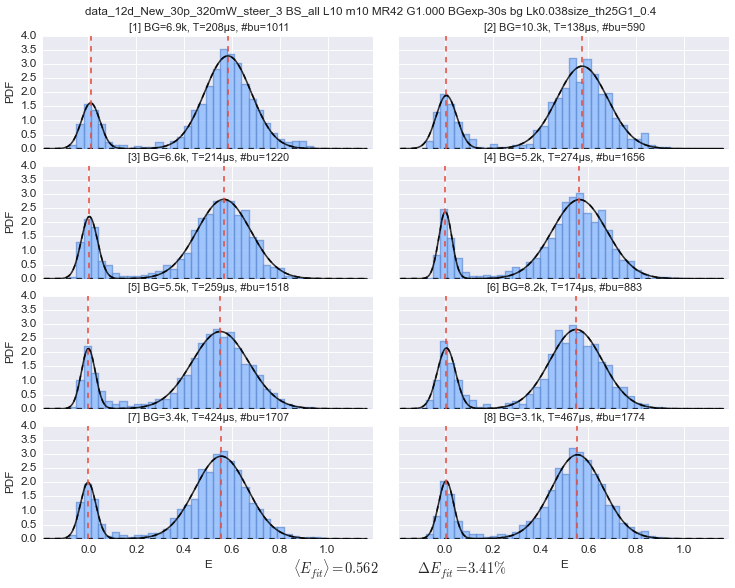

In [29]:
dplot(ds, hist_fret, weights=None, show_model=True,
      show_fit_stats=True, fit_from='p2_center');

###Weighted Expectation Maximization

The [expectation maximization](http://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) (EM) method is particularly suited to resolve population mixtures. Note that the EM algorithm does not fir the histogram but the $E$ distribution (one value per burst).

FRETBursts include a weighted version of the algorithm that can take into account the burst size.
The algorithm and benchmarks with the 2-Gaussian histogram fit are reported [here](http://nbviewer.ipython.org/github/tritemio/notebooks/blob/master/Mixture_Model_Fitting.ipynb).

You can find the EM algorithm in `fretbursts/fit/gaussian_fit.py` or typing:

`bl.two_gaussian_fit_EM??`


In [30]:
# bl.two_gaussian_fit_EM??

In [31]:
EM_results = ds.fit_E_two_gauss_EM(weights=None, gamma=1.)
EM_results

array([ 0.58655155,  0.57814354,  0.55778843,  0.55654601,  0.54440284,
        0.55141229,  0.5522608 ,  0.55112078])

The fitted parameters for each channel are stored in the `fit_E_res` attribute:

In [32]:
ds.fit_E_name, ds.fit_E_res

('two_gaussian_fit_EM',
 array([[ 0.01639441,  0.04133455,  0.58655155,  0.11385675,  0.16092585],
        [ 0.01575277,  0.04417727,  0.57814354,  0.11338378,  0.20831781],
        [ 0.01439624,  0.03993718,  0.55778843,  0.11964061,  0.19968835],
        [ 0.01000033,  0.03242441,  0.55654601,  0.1275605 ,  0.1743351 ],
        [ 0.00947759,  0.03389794,  0.54440284,  0.1314326 ,  0.16584853],
        [ 0.01591813,  0.04486999,  0.55141229,  0.11501298,  0.21803168],
        [ 0.00672047,  0.03691092,  0.5522608 ,  0.12443467,  0.16765869],
        [ 0.01339861,  0.03935058,  0.55112078,  0.1216904 ,  0.17210592]]))

The model function is stored in:

In [33]:
ds.fit_E_model

<function fretbursts.fit.gaussian_fitting.two_gauss_mix_pdf>

Let's plot the histogram and the model with parameters from the EM fit:

E mean: 55.98%   E delta: 4.21%


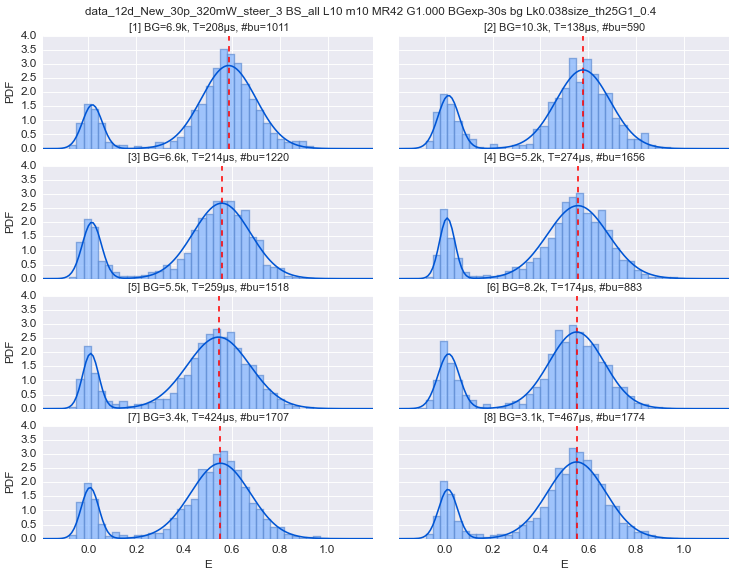

In [34]:
AX = dplot(ds, hist_fret, weights=None)

x = np.r_[-0.2: 1.2 : 0.01]
for ich, (ax, E_fit) in enumerate(zip(AX.ravel(), EM_results)):
    ax.axvline(E_fit, ls='--', color='r')
    ax.plot(x, ds.fit_E_model(x, ds.fit_E_res[ich]))

print 'E mean: %.2f%%   E delta: %.2f%%' %\
        (EM_results.mean()*100, (EM_results.max() - EM_results.min())*100)

## Comparing 2-Gaussian and EM fit

To quickly compare the 2-Gaussians with the EM fit we convert the EM fit results in a DataFrame:

In [35]:
import pandas as pd

In [36]:
EM_results = pd.DataFrame(ds.fit_E_res, columns=['p1_center', 'p1_sigma', 'p2_center', 'p2_sigma', 'p1_amplitude'])
EM_results * 100

,p1_center,p1_sigma,p2_center,p2_sigma,p1_amplitude
0,1.639441,4.133455,58.655155,11.385675,16.092585
1,1.575277,4.417727,57.814354,11.338378,20.831781
2,1.439624,3.993718,55.778843,11.964061,19.968835
3,1.000033,3.242441,55.654601,12.756050,17.433510
4,0.947759,3.389794,54.440284,13.143260,16.584853
5,1.591813,4.486999,55.141229,11.501298,21.803168
6,0.672047,3.691092,55.226080,12.443467,16.765869
7,1.339861,3.935058,55.112078,12.169040,17.210592


In [37]:
ds.E_fitter.params * 100

,p2_center,p1_sigma,p1_center,p2_amplitude,p2_sigma,p1_amplitude
0,58.32623,3.89312,0.9362509,80.40815,9.77268,15.81942
1,57.49006,4.331868,0.6664334,77.9328,10.65066,20.44385
2,56.66107,3.454152,0.4056891,78.7448,11.19466,19.03068
3,56.30488,2.780333,0.2136078,80.28537,11.44251,16.49553
4,55.16281,2.945006,-0.02683416,81.22893,11.86797,15.69254
5,54.91373,3.836944,0.6786607,77.39523,11.01629,20.64355
6,55.57532,3.282982,-0.1295577,80.47344,10.99789,16.39296
7,55.47366,3.155131,0.5485045,79.95965,10.73709,16.16016


And we compute the difference between the two sets of parameters:

In [38]:
(ds.E_fitter.params - EM_results) * 100

,p1_amplitude,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma
0,-0.2731698,-0.70319,-0.2403343,NaN,-0.3289232,-1.612995
1,-0.3879272,-0.9088437,-0.08585942,NaN,-0.3242989,-0.6877162
2,-0.9381517,-1.033935,-0.5395657,NaN,0.8822281,-0.7693962
3,-0.9379811,-0.7864256,-0.4621075,NaN,0.6502776,-1.313536
4,-0.8923137,-0.9745931,-0.4447887,NaN,0.7225294,-1.275293
5,-1.159619,-0.9131522,-0.6500548,NaN,-0.2275028,-0.4850082
6,-0.3729131,-0.8016045,-0.40811,NaN,0.3492425,-1.445576
7,-1.050435,-0.7913566,-0.7799272,NaN,0.3615857,-1.431947


> **NOTE:** The EM method follows more the "asymmetry" of the peaks because the center is a weighted mean of the bursts. On the contrary the 2-Gaussians histogram fit tends to follows more the peak position an less the "asymmetric" tails.  


##Notebook style

In [39]:
from IPython.core.display import HTML
HTML(open("./styles/custom2.css", "r").read())